In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline

In [ ]:
df = pd.read_csv("/content/Fuel_Consumption.csv - Fuel_Consumption.csv.csv")
df


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
#le = preprocessing.LabelEncoder()
#balance_data =df.apply(le.fit_transform)
#le.fit(df['MAKE'])

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


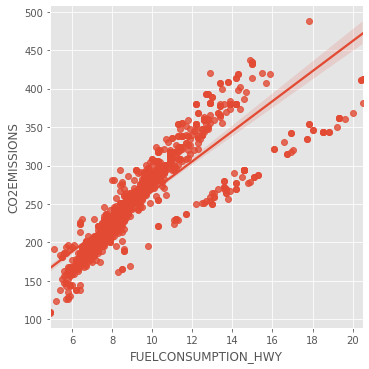

In [ ]:
sns.lmplot(x='FUELCONSUMPTION_HWY',y='CO2EMISSIONS',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

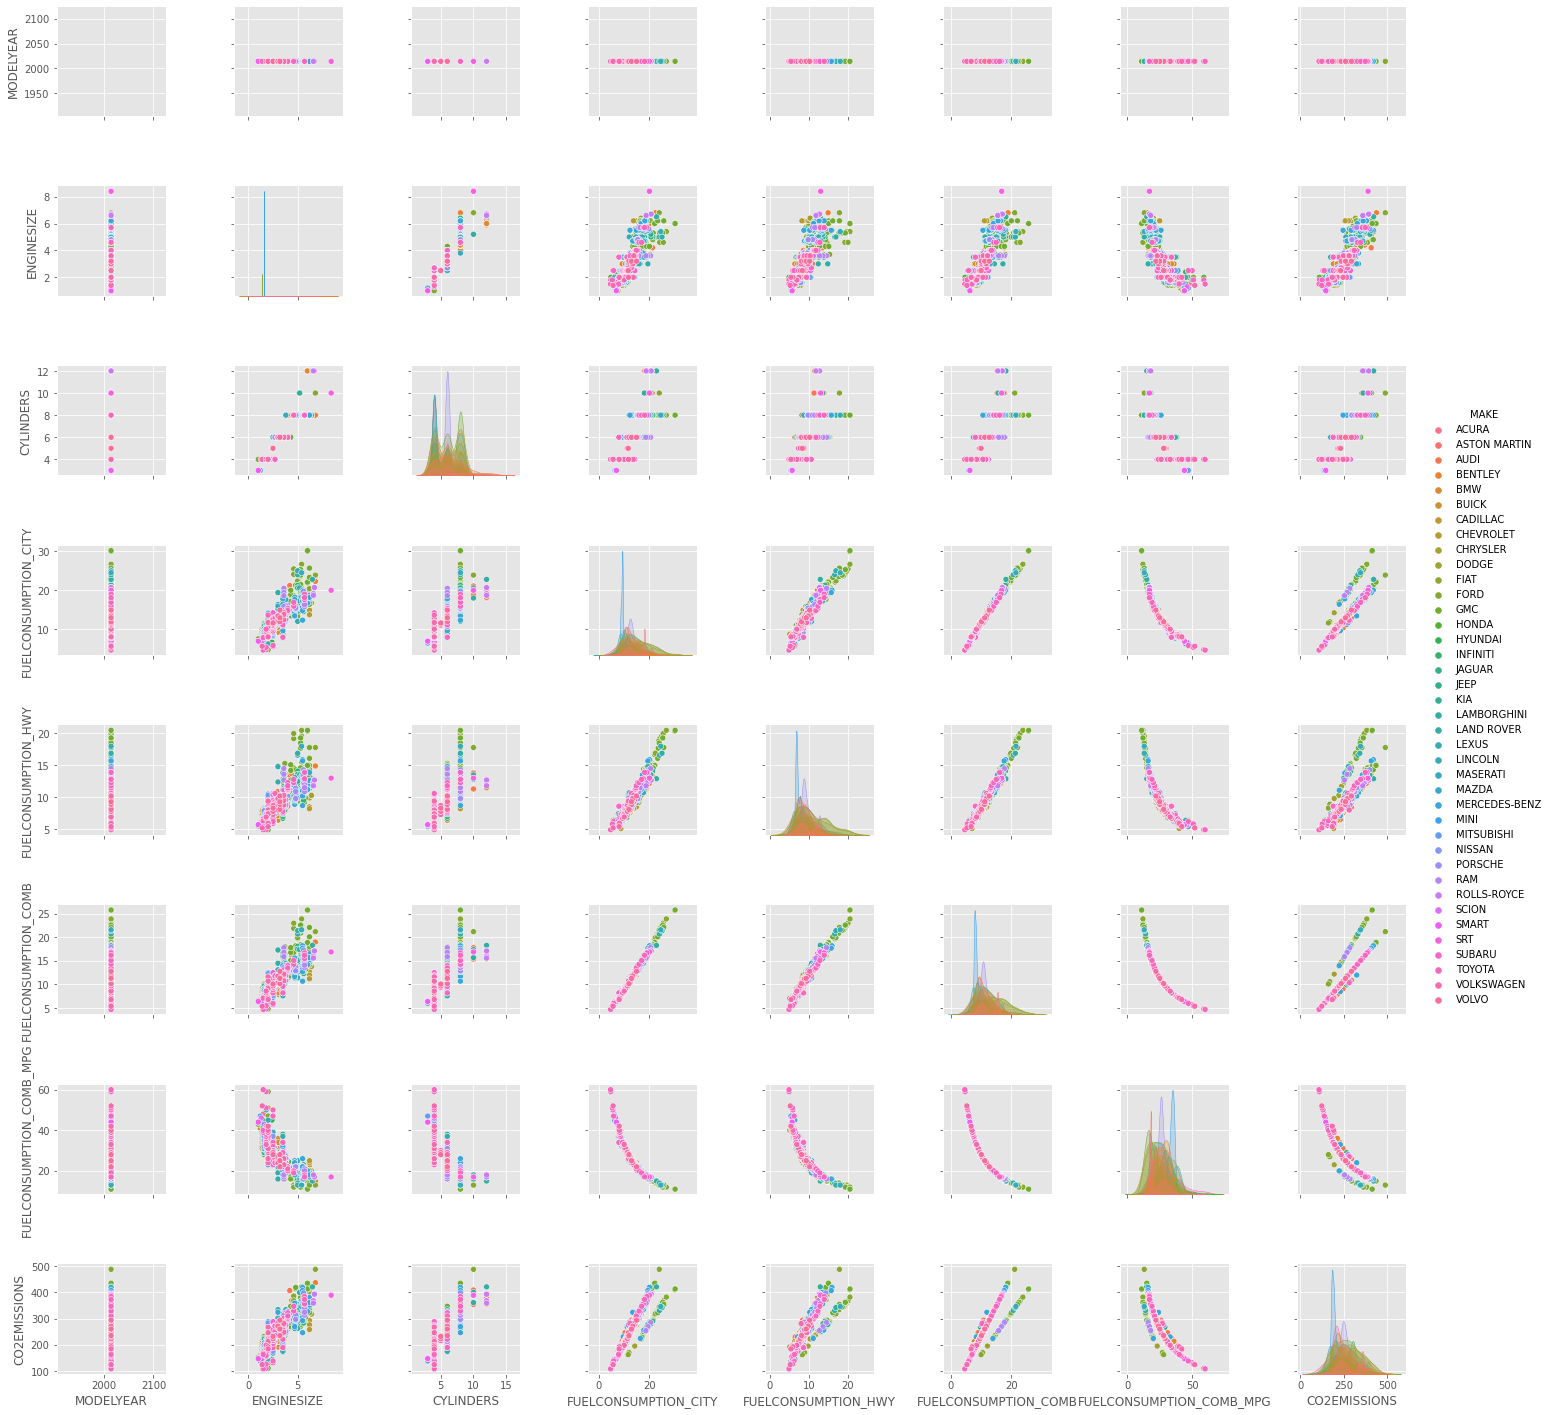

In [ ]:
plt.style.use('ggplot')
sns.pairplot(df, hue= 'MAKE')

In [ ]:
#X = pd.get_dummies(df).values
#y = pd.get_dummies(df).values
#label = le.fit_transform(df["MAKE"])


In [ ]:
X = df.drop(columns=['CO2EMISSIONS','MAKE','MODEL','TRANSMISSION','FUELTYPE','VEHICLECLASS'])

y = df["CO2EMISSIONS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

#ohe = OneHotEncoder()
#ohe.fit(X[['MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']])
X

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,2.0,4,9.9,6.7,8.5,33
1,2014,2.4,4,11.2,7.7,9.6,29
2,2014,1.5,4,6.0,5.8,5.9,48
3,2014,3.5,6,12.7,9.1,11.1,25
4,2014,3.5,6,12.1,8.7,10.6,27
...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24
1063,2014,3.2,6,13.2,9.5,11.5,25
1064,2014,3.0,6,13.4,9.8,11.8,24
1065,2014,3.2,6,12.9,9.3,11.3,25


In [ ]:
#col_tran = make_column_transformer(
    #(OneHotEncoder(categories= ohe.categories_),['MODEL','VEHICLECLASS','FUELTYPE']),remainder = "passthrough")

In [ ]:
model = LinearRegression()
#X  = col_tran.fit_transform(X)

In [ ]:
#pipe  = make_pipeline(col_tran,model)
#pipe.fit(X_train,y_train)
#y_pre = pipe.predict(X_test)

In [ ]:
#model.predict(X_test)
#pred = pipe.predict(X_test)

In [ ]:
X_train.shape


(714, 7)

In [ ]:
X_test.shape

(353, 7)

In [ ]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred


array([162.84255179, 253.52208088, 323.02919096, 214.69672183,
       347.54942418, 306.69971622, 248.78105362, 203.52927437,
       273.5861913 , 252.95112626, 304.33758033, 258.54801518,
       339.19169666, 294.62367573, 220.36205474, 304.17615793,
       171.15200616, 268.69955172, 208.03498052, 312.42696423,
       274.88283317, 212.12183959, 204.48522703, 262.34395563,
       224.59404247, 293.59699689, 300.90817346, 343.6715827 ,
       276.08628511, 317.66366377, 182.70011493, 220.28906249,
       207.19305955, 217.12361187, 205.53378569, 196.48598226,
       222.3643977 , 276.17688362, 162.7412483 , 271.84322022,
       166.59061789, 273.5861913 , 288.21364954, 257.8399342 ,
       182.70011493, 264.39930467, 258.54801518, 269.63987898,
       137.30494026, 271.51165132, 378.44473815, 216.52455752,
       297.58544967, 215.74528049, 189.97388397, 177.97016481,
       197.6894342 , 197.50406131, 315.22313178, 314.05242294,
       204.3085514 , 336.22785206, 378.28698893, 250.61

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 13.36507230215877
Mean Squared Error: 381.1287226056337
Mean Root Squared Error: 19.522518346915025


In [ ]:
lr.predict(X_test)